In [1]:
import mpy
import numpy as np
import matplotlib.pyplot as plt
import mpy.fitting as fitting

In [2]:
nfp = 4

def getSampleS(theta: np.ndarray, zeta: np.ndarray) -> np.ndarray:
    assert theta.size == zeta.size
    zeta = nfp * zeta
    return 0.7*np.sin(theta) + 0.6*np.sin(zeta-2) - 0.2*np.cos(3*zeta) + 0.2*np.sin(4*theta-2)

In [3]:
__sampleNums = 320
__sampleTheta = np.random.rand(__sampleNums) * 2*np.pi
__sampleZeta = np.random.rand(__sampleNums) * np.pi
__sampleS = getSampleS(__sampleTheta, __sampleZeta) + 0.2*np.random.rand(__sampleTheta.size)

res = fitting.fitSurface(__sampleTheta, __sampleZeta, __sampleS, mpol=5, ntol=5, nfp=4, debug=True, verbose=2)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.0575e+01                                    1.14e+02    
       1              2         3.2260e-01      8.03e+01       1.00e+00       4.71e-03    
       2              3         3.2260e-01      1.37e-07       2.00e+00       1.75e-08    
       3              4         3.2260e-01      1.11e-16       4.00e+00       1.36e-08    
`ftol` termination condition is satisfied.
Function evaluations 4, initial cost 8.0575e+01, final cost 3.2260e-01, first-order optimality 1.36e-08.


In [4]:
_sampleNums = 50
_zetaNums = 10
_sampleZeta = np.empty((_zetaNums, _sampleNums))
for i in range(_sampleNums):
    _sampleZeta[:, i] = np.linspace(0, 2*np.pi/nfp, _zetaNums)
_sampleTheta = np.random.rand(_zetaNums, _sampleNums) * 2*np.pi
_sampleS = getSampleS(_sampleTheta, _sampleZeta) + 0.05*np.random.rand(_zetaNums, _sampleNums)

In [5]:
_xm, _xn, _coeffSin, _coeffCos = fitting.fitSurface(_sampleTheta, _sampleZeta, _sampleS, mpol=10, ntol=10, nfp=nfp, verbose=2)

def getS(theta: np.ndarray, zeta: np.ndarray) -> np.ndarray:
    angleMat = (
        np.dot(_xm.reshape(-1,1), theta.reshape(1,-1)) - 
        nfp * np.dot(_xn.reshape(-1,1), zeta.reshape(1,-1))
    )
    return (
        np.dot(_coeffSin.reshape(1,-1), np.sin(angleMat)) + 
        np.dot(_coeffCos.reshape(1,-1), np.cos(angleMat))
    ).flatten()

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.2635e+02                                    1.76e+02    
       1              2         3.3701e-02      1.26e+02       1.00e+00       6.18e-03    
       2              3         3.3701e-02      1.56e-07       2.00e+00       3.48e-06    
       3              4         3.3701e-02      1.74e-13       2.00e+00       3.22e-06    
       4              5         3.3701e-02      3.70e-13       5.00e-01       6.84e-07    
       5              6         3.3701e-02      2.79e-14       1.25e-01       1.36e-07    
       6              7         3.3701e-02      4.44e-16       3.12e-02       2.28e-08    
       7              9         3.3701e-02      9.71e-17       1.95e-03       8.24e-09    
`gtol` termination condition is satisfied.
Function evaluations 9, initial cost 1.2635e+02, final cost 3.3701e-02, first-order optimality 8.24e-09.


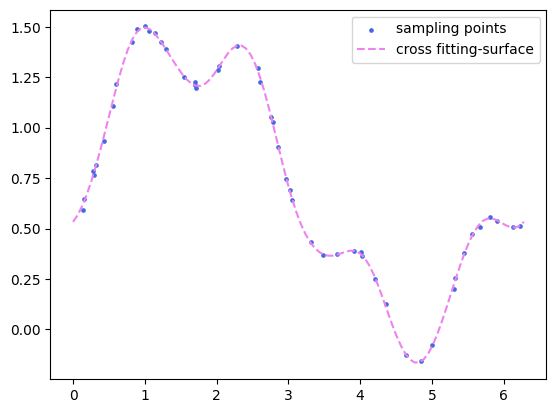

In [6]:
index = 5
plt.scatter(_sampleTheta[index,:], _sampleS[index,:], s=5.5, color="royalBlue", label="sampling points")
_angle = np.linspace(0, 2*np.pi, 100)
plt.plot(_angle, getS(_angle, np.ones(100)*_sampleZeta[index,0]), color="violet", ls="--", label="cross fitting-surface")
plt.legend()

In [7]:
def getSampleR(theta: np.ndarray, zeta: np.ndarray) -> np.ndarray:
    zeta = zeta * nfp
    return 3 + 0.3*np.cos(theta) - 0.1*np.cos(theta-zeta) + 0.05*np.sin(5*theta-4*zeta)

def getSampleZ(theta: np.ndarray, zeta: np.ndarray) -> np.ndarray:
    zeta = zeta * nfp
    return - 0.3*np.sin(theta) - 0.1*np.sin(zeta) - 0.1*np.sin(theta-zeta) + 0.04*np.sin(3*theta-2*zeta)

In [8]:
sampleNums = 64
zetaNums = 10
sampleZeta = np.empty((zetaNums, sampleNums))
for i in range(sampleNums):
    sampleZeta[:, i] = np.linspace(0, 2*np.pi/nfp, zetaNums)
sampleTheta = np.random.rand(zetaNums, sampleNums) * 2*np.pi
sampleR = getSampleR(sampleTheta, sampleZeta) + 0.02*np.random.rand(zetaNums, sampleNums)
sampleZ = getSampleZ(sampleTheta, sampleZeta) + 0.02*np.random.rand(zetaNums, sampleNums)

In [9]:
xm, xn, rSin, rCos = fitting.fitSurface(sampleTheta, sampleZeta, sampleR, mpol=8, ntol=8, nfp=nfp, verbose=2)
xm, xn, zSin, zCos = fitting.fitSurface(sampleTheta, sampleZeta, sampleZ, mpol=8, ntol=8, nfp=nfp, verbose=2)

def getR(theta: np.ndarray, zeta: np.ndarray) -> np.ndarray:
    angleMat = (
        np.dot(xm.reshape(-1,1), theta.reshape(1,-1)) - 
        nfp * np.dot(xn.reshape(-1,1), zeta.reshape(1,-1))
    )
    return (
        np.dot(rSin.reshape(1,-1), np.sin(angleMat)) + 
        np.dot(rCos.reshape(1,-1), np.cos(angleMat))
    ).flatten()

def getZ(theta: np.ndarray, zeta: np.ndarray) -> np.ndarray:
    angleMat = (
        np.dot(xm.reshape(-1,1), theta.reshape(1,-1)) - 
        nfp * np.dot(xn.reshape(-1,1), zeta.reshape(1,-1))
    )
    return (
        np.dot(zSin.reshape(1,-1), np.sin(angleMat)) + 
        np.dot(zCos.reshape(1,-1), np.cos(angleMat))
    ).flatten()

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.8958e+03                                    1.92e+03    
       1              2         1.1753e+03      1.72e+03       1.00e+00       1.20e+03    
       2              3         2.4188e+00      1.17e+03       2.00e+00       3.98e+01    
       3              4         8.3663e-03      2.41e+00       4.00e+00       3.28e-06    
       4              6         8.3663e-03      2.54e-14       2.00e+00       3.48e-06    
       5              7         8.3663e-03      8.24e-14       5.00e-01       2.51e-06    
       6              8         8.3663e-03      2.04e-13       1.25e-01       4.83e-07    
       7              9         8.3663e-03      7.33e-15       3.12e-02       1.15e-07    
       8             10         8.3663e-03      2.71e-16       7.81e-03       4.99e-08    
       9             11         8.3663e-03      1.56e-16       1.95e-03       1.80e-08    

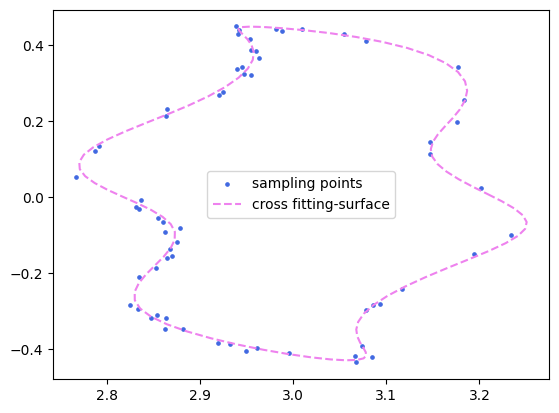

In [10]:
index = 0
plt.scatter(sampleR[index,:], sampleZ[index,:], s=5.5, color="royalBlue", label="sampling points")
angle = np.linspace(0, 2*np.pi, 100)
plt.plot(getR(angle, np.ones(100)*sampleZeta[index,0]), getZ(angle, np.ones(100)*sampleZeta[index,0]), color="violet", ls="--", label="cross fitting-surface")
plt.legend()